# Assignment_2_Campus_Placement_KeshavGautam_C0919124

# 1. Importing the Data and Required Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Loading the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Displaying the first few rows of train data 
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Displaying the first few rows of test data
test_df.head()

,sl_no,gender,salary
0,123,1,236000.000000
1,199,1,288655.405405
2,138,0,225000.000000
3,137,1,288655.405405
4,76,1,288655.405405


# 2. Exploratory Data Analysis (EDA)

### a) Dataset Overview

In [5]:
# Displaying the basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   43 non-null     int64  
 1   gender  43 non-null     int64  
 2   salary  43 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


### b) Descriptive Statistics

In [7]:
# Descriptive statistics for numeric features
train_df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
test_df.describe()

,sl_no,gender,salary
count,43.000000,43.000000,43.000000
mean,109.511628,0.418605,291360.150849
std,56.870518,0.499169,74495.346053
min,11.000000,0.000000,216000.000000
25%,71.000000,0.000000,250000.000000
50%,103.000000,0.000000,288655.405405
75%,151.500000,1.000000,288655.405405
max,210.000000,1.000000,650000.000000


### c) Visualizing Missing Values

In [9]:
# checking for missing values of train data 
missing_values = train_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [10]:
# checking for missing values of test data 
missing_values_for_test_df = test_df.isnull().sum()
print("Missing values per column:")
print(missing_values_for_test_df)

Missing values per column:
sl_no     0
gender    0
salary    0
dtype: int64


There is no any missing value on test data.

### d) Handling Missing Values

In [11]:
# Filling missing salary values with 0 (for students who were not placed) ---> For train data
train_df['salary'].fillna(0, inplace=True)

# Verifying that there are no more missing values
missing_values = train_df.isnull().sum()
print("Missing values after filling:")
print(missing_values)

Missing values after filling:
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


### e) Visulalizing Data Distributions

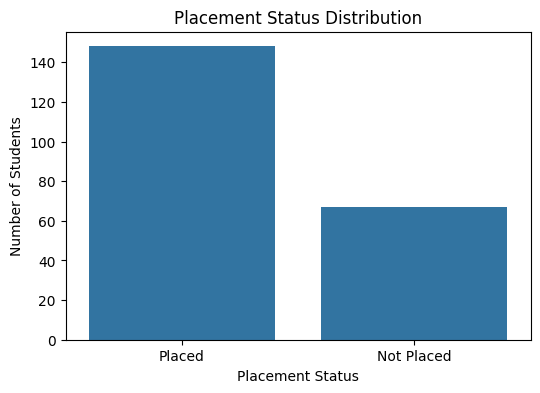

In [12]:
# Create a bar graph for placement status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=train_df)  # Set 'x' for vertical bars
plt.title('Placement Status Distribution')
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.show()

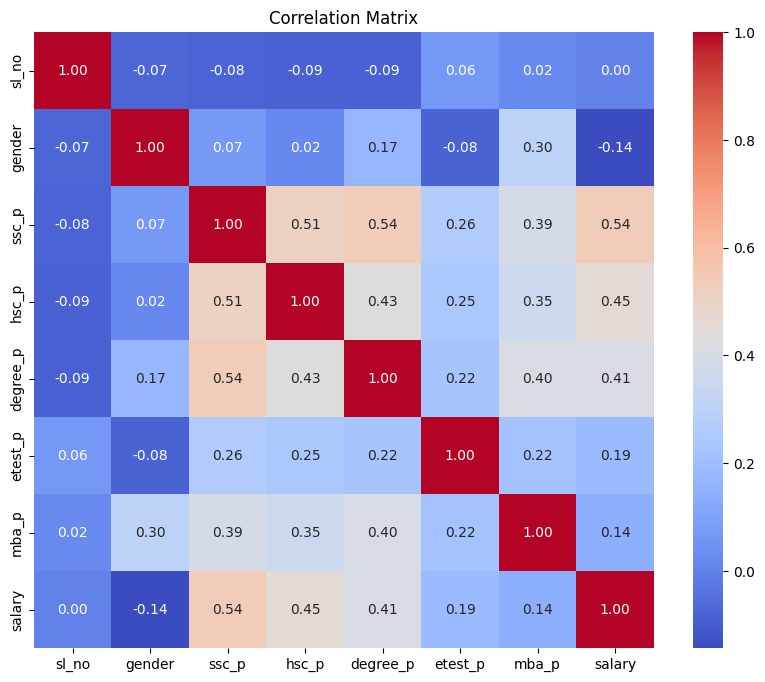

In [13]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Visualizing the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

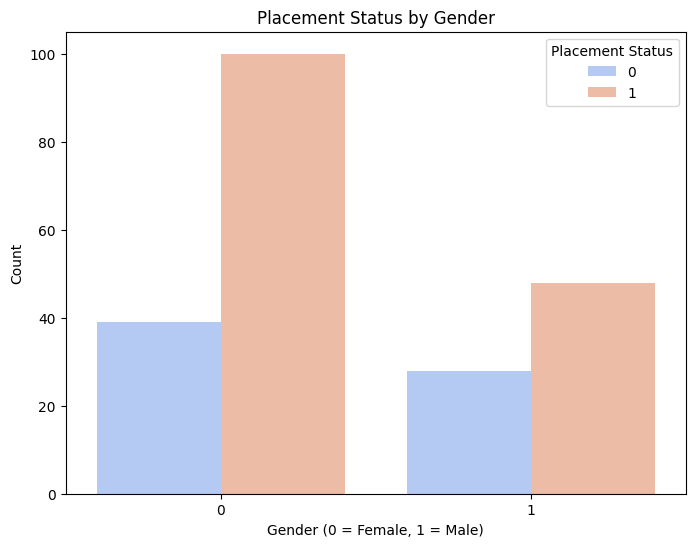

In [27]:
# Gender Distribution of Placement Status 
plt.figure(figsize=(8,6))
sns.countplot(train_df, x='gender', hue='status', palette='coolwarm')
plt.title('Placement Status by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Placement Status', loc='upper right')
plt.show()

If males have a significantly higher number of placements, it may indicate gender differences in hiring trends, or it could point to gender differences in chosen specializations.

C:\Users\Keshav Gautam\AppData\Local\Temp\ipykernel_3320\1922313252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x='status', y='ssc_p', palette='coolwarm')


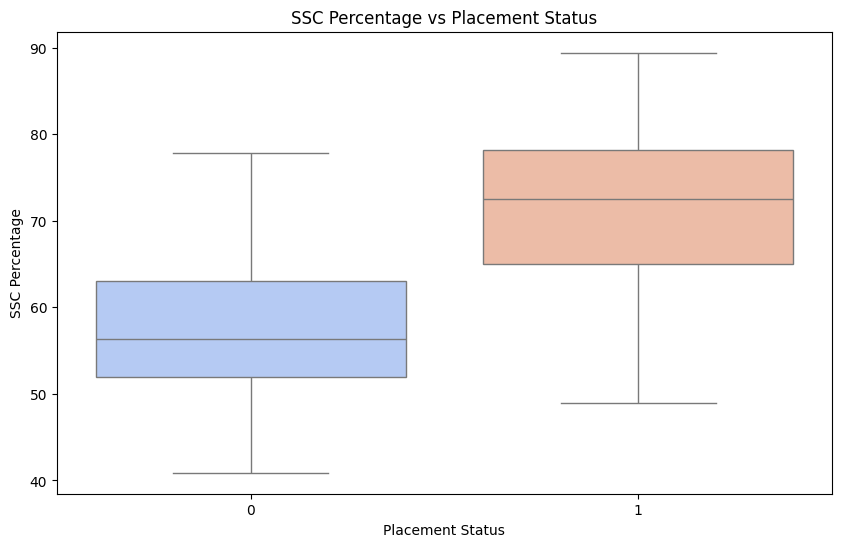

In [33]:
# Relationship Between SSC Percentage and Placement Status 
plt.figure(figsize=(10,6))
sns.boxplot(train_df, x='status', y='ssc_p', palette='coolwarm')
plt.title('SSC Percentage vs Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('SSC Percentage')
plt.show()

If students with higher SSC percentages tend to get placed more, it suggests that early academic performance could inflluence employability.

# MBA Specialization vs Salary for Placed Students

# 3. Data Pre-Processing

 Encoding Categorical Features

### a) Encoding the Target Variable

In [14]:
# Encoding the target variable: 'status' -> 1 (Placed), 0 (Not Placed)
train_df['status'] = train_df['status'].map({'Placed': 1, 'Not Placed': 0})

# Verify encoding
train_df['status'].value_counts()


status
1    148
0     67
Name: count, dtype: int64

### b) One-Hot Encoding Categorical Features

In [15]:
# List of categorical columns to encode
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Perform one-hot encoding using pandas get_dummies
train_encoded_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
train_encoded_df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_1,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,1,270000.0,False,True,True,True,False,False,True,False,True
1,2,79.33,78.33,77.48,86.5,66.28,1,200000.0,False,False,True,False,True,False,True,True,False
2,3,65.00,68.00,64.00,75.0,57.80,1,250000.0,False,False,False,False,False,False,False,False,False
3,4,56.00,52.00,52.00,66.0,59.43,0,0.0,False,False,False,False,True,False,True,False,True
4,5,85.80,73.60,73.30,96.8,55.50,1,425000.0,False,False,False,True,False,False,False,False,False


### c) Splitting the Data into Training and Test Sets

In [16]:
# Defining the features (X) and target (y)
X = train_encoded_df.drop(columns=['sl_no', 'status', 'salary'])  # Dropping irrelevant columns
y = train_encoded_df['status']

# Splitting the dataset: 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (150, 14)
X_test shape: (65, 14)
y_train shape: (150,)
y_test shape: (65,)


# 4. Model Selection and Hyperparameter Tuning

### a) Logistic Regression

In [17]:
# Logistic Regression with hyperparameter tuning
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)

# Best parameters for Logistic Regression
print("Best Logistic Regression Params: ", log_reg_cv.best_params_)

c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Best Logistic Regression Params:  {'C': 1}


### b) Random Forest Classifier

In [18]:
# Random Forest with hyperparameter tuning
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_cv = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best Random Forest Params: ", rf_cv.best_params_)

Best Random Forest Params:  {'max_depth': None, 'n_estimators': 200}


### c) Support Vector Machine

In [19]:
# SVM with hyperparameter tuning
svm_clf = SVC(probability=True, random_state=42)
svm_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_cv = GridSearchCV(svm_clf, svm_params, cv=5, scoring='accuracy')
svm_cv.fit(X_train, y_train)

# Best parameters for SVM
print("Best SVM Params: ", svm_cv.best_params_)

Best SVM Params:  {'C': 1, 'kernel': 'linear'}


# 5. Model Evaluation

### a) Evaluating each model 

In [20]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, cm

# Logistic Regression Evaluation
log_reg_acc, log_reg_prec, log_reg_rec, log_reg_f1, log_reg_cm = evaluate_model(log_reg_cv.best_estimator_, X_test, y_test)
print(f"Logistic Regression - Accuracy: {log_reg_acc}, Precision: {log_reg_prec}, Recall: {log_reg_rec}, F1 Score: {log_reg_f1}")
print("Confusion Matrix:")
print(log_reg_cm)

# Random Forest Evaluation
rf_acc, rf_prec, rf_rec, rf_f1, rf_cm = evaluate_model(rf_cv.best_estimator_, X_test, y_test)
print(f"Random Forest - Accuracy: {rf_acc}, Precision: {rf_prec}, Recall: {rf_rec}, F1 Score: {rf_f1}")
print("Confusion Matrix:")
print(rf_cm)

# SVM Evaluation
svm_acc, svm_prec, svm_rec, svm_f1, svm_cm = evaluate_model(svm_cv.best_estimator_, X_test, y_test)
print(f"SVM - Accuracy: {svm_acc}, Precision: {svm_prec}, Recall: {svm_rec}, F1 Score: {svm_f1}")
print("Confusion Matrix:")
print(svm_cm)

Logistic Regression - Accuracy: 0.8153846153846154, Precision: 0.8333333333333334, Recall: 0.9090909090909091, F1 Score: 0.8695652173913043
Confusion Matrix:
[[13  8]
 [ 4 40]]
Random Forest - Accuracy: 0.8, Precision: 0.7924528301886793, Recall: 0.9545454545454546, F1 Score: 0.865979381443299
Confusion Matrix:
[[10 11]
 [ 2 42]]
SVM - Accuracy: 0.8461538461538461, Precision: 0.8695652173913043, Recall: 0.9090909090909091, F1 Score: 0.888888888888889
Confusion Matrix:
[[15  6]
 [ 4 40]]


### b) Comparing Model Performance 

In [21]:
# Comparing models based on evaluation metrics
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_acc, rf_acc, svm_acc],
    'Precision': [log_reg_prec, rf_prec, svm_prec],
    'Recall': [log_reg_rec, rf_rec, svm_rec],
    'F1 Score': [log_reg_f1, rf_f1, svm_f1]
})

print(model_comparison)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.815385   0.833333  0.909091  0.869565
1        Random Forest  0.800000   0.792453  0.954545  0.865979
2                  SVM  0.846154   0.869565  0.909091  0.888889


### c) Plotting Confusion Matrices For Each Model

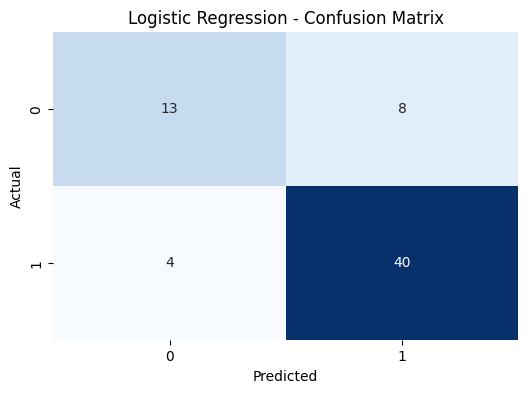

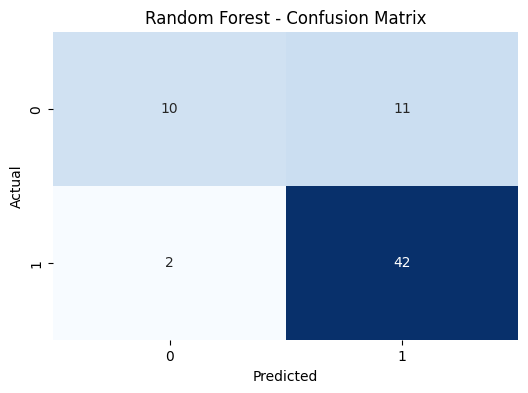

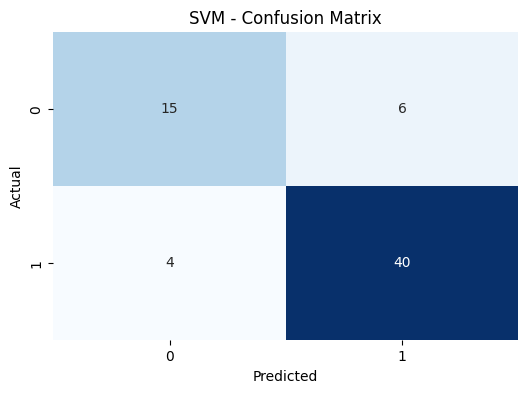

In [22]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Confusion Matrix for Logistic Regression
plot_confusion_matrix(log_reg_cm, 'Logistic Regression - Confusion Matrix')

# Confusion Matrix for Random Forest
plot_confusion_matrix(rf_cm, 'Random Forest - Confusion Matrix')

# Confusion Matrix for SVM
plot_confusion_matrix(svm_cm, 'SVM - Confusion Matrix')

### d) Visualizing Model Comparison: Accuracy, Precision, Recall, and F1-Score

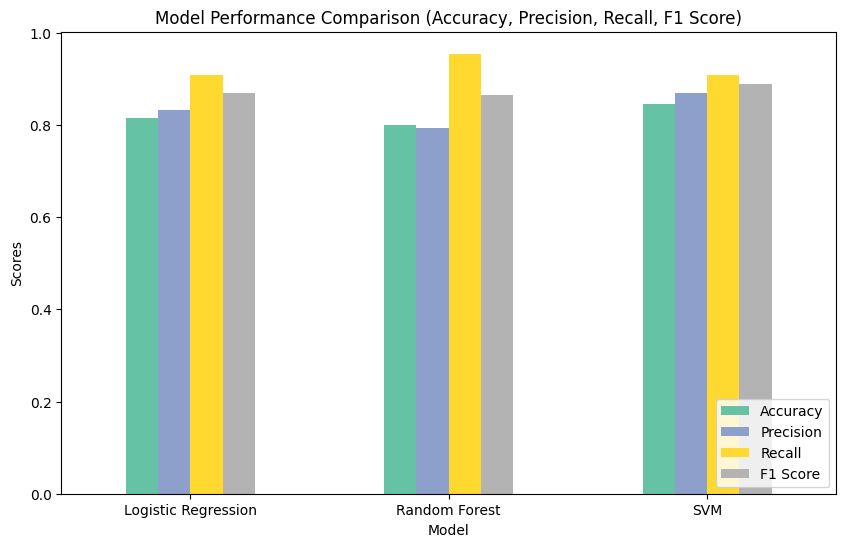

In [23]:
# Visualization of Model Comparison
model_comparison.set_index('Model', inplace=True)

# Plotting the comparison
model_comparison.plot(kind='bar', figsize=(10, 6), colormap='Set2', rot=0)
plt.title('Model Performance Comparison (Accuracy, Precision, Recall, F1 Score)')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

# 6. Voting Classifier (Ensembling all the three models)

In [24]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier using the three models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_cv.best_estimator_),
    ('rf', rf_cv.best_estimator_),
    ('svm', svm_cv.best_estimator_)
], voting='soft')

voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
voting_acc, voting_prec, voting_rec, voting_f1, voting_cm = evaluate_model(voting_clf, X_test, y_test)
print(f"Voting Classifier - Accuracy: {voting_acc}, Precision: {voting_prec}, Recall: {voting_rec}, F1 Score: {voting_f1}")
print("Confusion Matrix:")
print(voting_cm)


Voting Classifier - Accuracy: 0.7846153846153846, Precision: 0.8, Recall: 0.9090909090909091, F1 Score: 0.8510638297872342
Confusion Matrix:
[[11 10]
 [ 4 40]]


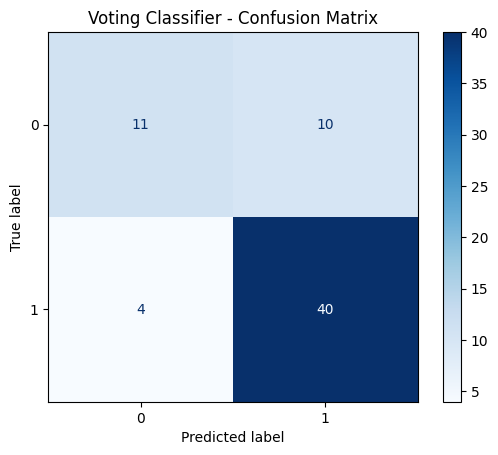

In [25]:
# Generate predictions for the test set
y_pred = voting_clf.predict(X_test)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Voting Classifier - Confusion Matrix')
plt.show()